In [7]:
# Imports
## 3rd-party
import utilities as util

import pingouin as pg
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)
from scipy import stats
import numpy as np

from IPython.display import display

## Built-in
import os
import importlib

print('Directory Contents:')
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        if '/.' in dirname: continue
        print('\t', os.path.join(dirname, filename))

Directory Contents:
	 ./test_utilities.ipynb
	 ./AmesHousingEDA.ipynb
	 ./.utilities.py.swp
	 ./AmesHousingPriceRegression.ipynb
	 ./README.md
	 ./.gitignore
	 ./utilities.py
	 ./sample_submission.csv
	 ./__pycache__/utilities.cpython-38.pyc
	 ./data/test.csv
	 ./data/data_description.txt
	 ./data/train.csv


In [8]:
importlib.reload(util)

<module 'utilities' from '/Users/alexarmstrong/Google Drive/MacDocuments/Personal/Coding/Projects/KaggleDatasets/AmesHousingPrice/utilities.py'>

In [9]:
data_dir = './data'
df = pd.read_csv(f'{data_dir}/train.csv')

In [10]:
manual_type_set = {
    'Continuous' : [
       'LowQualFinSF',  # very few unique values 
       '3SsnPorch', 
       'PoolArea',
       'MiscVal',
    ],
    'Discrete' : [
        'Id',
        'Bedroom',
        'KitchenAbvGr', # called just 'Kitchen' in data_description.txt
        'Fireplaces',
        'MoSold',
        'YrSold',
        'YearBuilt',
        'GarageYrBlt',
        'YearRemodAdd',
        'GarageCars',
        'HalfBath',
        'FullBath',
        'BsmtHalfBath',
        'BsmtFullBath',
    ],
    'Ordinal' : [
        'OverallQual',
        'OverallCond',
        'ExterQual',
        'ExterCond',
        'PoolQC',
        'Fence',
        'BsmtFinType1',
        'BsmtFinType2',
        'BsmtQual',
        'BsmtCond',
        'BsmtExposure',
        'GarageQual',
        'GarageType', # maybe?
        'GarageFinish',
        'GarageCond',
        'KitchenQual',
        'FireplaceQu',
        'HeatingQC',
        'Electrical',
        'Functional',
        'PavedDrive',
    ]
    #'Nominal' : [
    #    
    #]
}
manual_type_set = {v:k  for k in manual_type_set for v in manual_type_set[k]}

In [12]:
df_features = util.categorize_data_type(df, override=manual_type_set)
print(df_features.sort_values())

SalePrice        Continuous
BsmtUnfSF        Continuous
MasVnrArea       Continuous
TotalBsmtSF      Continuous
1stFlrSF         Continuous
2ndFlrSF         Continuous
LowQualFinSF     Continuous
GrLivArea        Continuous
BsmtFinSF2       Continuous
GarageArea       Continuous
WoodDeckSF       Continuous
BsmtFinSF1       Continuous
EnclosedPorch    Continuous
3SsnPorch        Continuous
LotFrontage      Continuous
LotArea          Continuous
MiscVal          Continuous
PoolArea         Continuous
OpenPorchSF      Continuous
ScreenPorch      Continuous
YrSold             Discrete
MoSold             Discrete
BsmtFullBath       Discrete
FullBath           Discrete
HalfBath           Discrete
KitchenAbvGr       Discrete
Fireplaces         Discrete
GarageCars         Discrete
BsmtHalfBath       Discrete
GarageYrBlt        Discrete
Id                 Discrete
YearBuilt          Discrete
YearRemodAdd       Discrete
RoofStyle           Nominal
Condition2          Nominal
LandSlope           

In [13]:
cat_cols = df_features.index[df_features.isin(['Ordinal','Nominal'])]
corr = util.corr_to_target(df, 'SalePrice', cat_cols)
display(corr.sort_values('R2', ascending=False))

,Categorical,R2,pval,MI
OverallQual,1,0.684181,6.442770e-18,5.768714e-01
Neighborhood,1,0.545575,3.019500e-54,5.256946e-01
GrLivArea,0,0.502149,4.518034e-223,3.739089e-01
ExterQual,1,0.477388,9.245777e-32,3.301419e-01
KitchenQual,1,0.456599,8.287137e-60,3.239141e-01
BsmtQual,1,0.453756,6.973936e-57,3.079944e-01
PoolQC,1,0.448651,6.780047e-01,0.000000e+00
GarageCars,0,0.410124,2.498644e-169,3.631513e-01
GarageArea,0,0.388667,5.265038e-158,2.892284e-01
TotalBsmtSF,0,0.376481,9.484229e-152,2.584719e-01


In [14]:
num_cols = df_features.index[df_features.isin(['Continuous','Discrete'])]
util.outlier_check(df, index=313, num_features=num_cols, print_result=True)

Outlier test for entry 313
Numerical Outliers


,Value,Mean,Median,NN value,|Z-score|,percentile-score,|MAD-score|
LotArea,215245.0,10516.828082,9478.5,164660.0,20.518273,100.000000,102.986236
BsmtFinSF2,820.0,46.549315,0.0,823.0,4.796176,98.904110,inf
TotalBsmtSF,2136.0,1057.429452,991.5,2136.0,2.459373,98.869863,4.880597
SalePrice,375000.0,180921.195890,163000.0,374000.0,2.443847,97.054795,5.578947
1stFlrSF,2036.0,1162.626712,1087.0,2042.0,2.259959,97.602740,4.046908
BsmtFinSF1,1236.0,443.639726,383.5,1237.0,1.737854,94.178082,2.222947
BsmtUnfSF,80.0,567.240411,477.5,80.0,1.103064,67.808219,1.380208
GrLivArea,2036.0,1515.463699,1464.0,2035.0,0.990931,78.424658,1.754601
Id,314.0,730.500000,730.5,315.0,0.988218,57.089041,1.141096
YearRemodAdd,1965.0,1984.865753,1994.0,1965.0,0.962566,76.780822,2.230769


Categorical Outliers


,Value,Mode,freq,freq rank,# unique,rel freq,cum freq,max freq ratio,NN freq ratio
LotShape,IR3,Reg,10.0,4.0,4.0,0.006849,0.006849,0.010811,0.243902
LandSlope,Sev,Gtl,13.0,3.0,3.0,0.008904,0.008904,0.009407,0.200000
BsmtFullBath,2,0,15.0,3.0,4.0,0.010274,0.010959,0.017523,0.025510
Heating,GasW,GasA,18.0,2.0,6.0,0.012329,0.021918,0.012605,0.012605
LandContour,Low,Lvl,36.0,4.0,4.0,0.024658,0.024658,0.027460,0.720000
Exterior2nd,BrkFace,VinylSd,25.0,9.0,16.0,0.017123,0.049315,0.049603,0.961538
Fireplaces,2,0,115.0,3.0,4.0,0.078767,0.082192,0.166667,0.176923
Exterior1st,BrkFace,VinylSd,50.0,7.0,15.0,0.034247,0.087671,0.097087,0.819672
BsmtFinType2,Rec,Unf,54.0,2.0,6.0,0.036986,0.113699,0.042994,0.042994
Neighborhood,Timber,NAmes,38.0,15.0,25.0,0.026027,0.154110,0.168889,0.926829


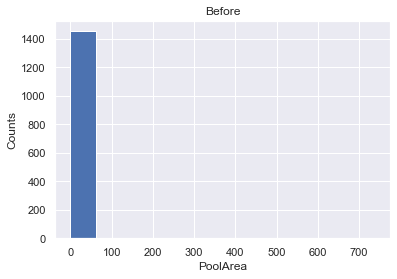

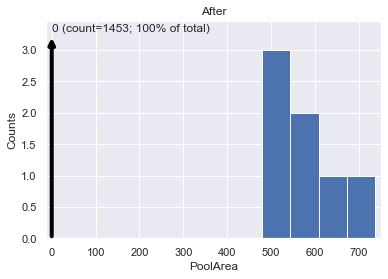

In [111]:
util.truncated_hist(df_train['PoolArea'], val=None)
plt.title("Before")
util.truncated_hist(df_train['PoolArea'], val='mode')
plt.title("After")
plt.show()

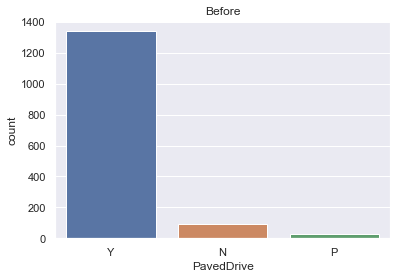

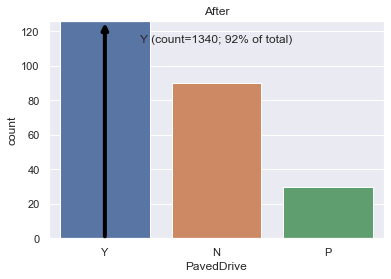

In [112]:
util.truncated_countplot(df_train['PavedDrive'], val=None)
plt.title("Before")
util.truncated_countplot(df_train['PavedDrive'], val='mode')
plt.title("After")
plt.show()

In [93]:
importlib.reload(util)

<module 'utilities' from '/Users/alexarmstrong/Google Drive/MacDocuments/Personal/Coding/Projects/KaggleDatasets/AmesHousingPrice/utilities.py'>

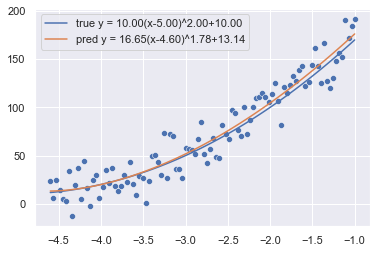

In [104]:
n = 100
x_range = 4
rel_unc = 0.1

a_true = 10
s_true = -5
p_true = 2
b_true = 10

y_range = a_true*(x_range)**p_true
x = np.linspace(s_true+1e-1*x_range,s_true+x_range, n)
y = a_true*(x-s_true)**p_true + b_true
y += stats.norm.rvs(size=len(x), scale=rel_unc*y_range)

popt = util.power_fit(x, y, neg_p=p_true<0)
a,s,p,b = popt

x_ref = np.linspace(x.min(), x.max(), 100)
y_pred = a*(x_ref - s)**p + b
y_true = a_true*(x_ref-s_true)**p_true + b_true

sns.scatterplot(x=x,y=y)
sns.lineplot(x=x_ref, y=y_true, label=f'true y = {a_true:.2f}(x{s_true:+.2f})^{p_true:.2f}{b_true:+.2f}')
sns.lineplot(x=x_ref, y=y_pred, label=f'pred y = {a:.2f}(x{s:+.2f})^{p:.2f}{b:+.2f}')
plt.show()